In [ ]:
input_date = '10.05.1983'
input_year = '2025'
father_name = 'Александр'
your_name = 'Тимур'

def calculate_life_code(input_date: str) -> str: # Функция вычисления кода жизни
    day, month, year = map(int, input_date.split('.')) # Разделение и преобразование в числа   
    result = str(day * month * year) # Вычисление произведения   
    if len(result) < 6:  # Дополнение нулями в конец до 6 цифр
        result += '0' * (6 - len(result))
    return result

def calc_name_diff(father: str, your: str) -> int:
    return max(len(father) - len(your), 0)

def reduce_to_single_digit(n: str | int) -> int:
    n = sum(int(d) for d in str(n))
    return n if n < 10 else sum(int(d) for d in str(n))

def calculate_fin_code(life_code: str, year_code: str, name_diff: int) -> list[int]:
    result = [
        reduce_to_single_digit(int(a) + int(b))
        for a, b in zip(life_code, year_code)
            ]
    result.append(name_diff)
    return result

# Расчёты
life_code = calculate_life_code(input_date)
digit_name = calc_name_diff(father_name, your_name)
digit_year = str(reduce_to_single_digit(input_year))
year_code = digit_year * 6

# Финальный список
fin_result = calculate_fin_code(life_code, year_code, digit_name)

# Для наглядности
print("life_code:", list(map(int, life_code)))
print("year_code:", list(map(int, year_code)))
print("result:", fin_result)

life_code: [9, 9, 1, 5, 0, 0]
year_code: [9, 9, 9, 9, 9, 9]
result: [9, 9, 1, 5, 9, 9, 4]


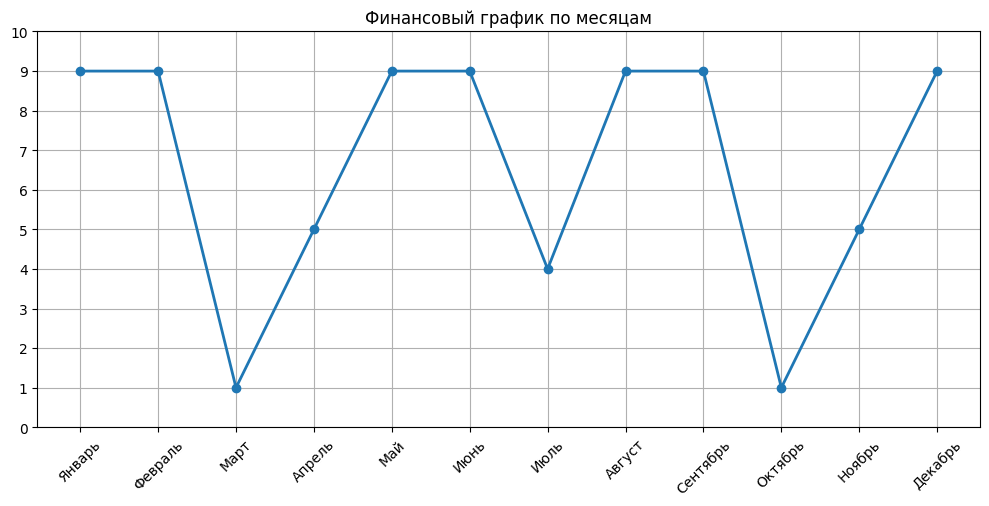

In [1]:
import matplotlib.pyplot as plt

# Входные данные
input_date = '10.05.1983' # input('Введите свою дату рождения')
input_year = '2025' # input('Введите год для финансового прогноза')
father_name = 'Александр' # input('Введите имя вашего отца')
your_name = 'Тимур' # input('Введите своё имя')

# Функция вычисления кода жизни
def calculate_life_code(input_date: str) -> str:
    day, month, year = map(int, input_date.split('.'))
    result = str(day * month * year)
    return result[:6].ljust(6, '0')  # обрезаем до 6 и дополняем нулями, если нужно

# Функция вычисления разницы в длине имён
def calc_name_diff(father: str, your: str) -> int:
    return max(len(father) - len(your), 0)

# Приведение к однозначному числу
def reduce_to_single_digit(n: str | int) -> int:
    n = sum(int(d) for d in str(n))
    return n if n < 10 else sum(int(d) for d in str(n))

# Финальный расчёт
def calculate_fin_code(life_code: str, year_code: str, name_diff: int) -> list[int]:
    result = [
        reduce_to_single_digit(int(a) + int(b))
        for a, b in zip(life_code, year_code)
    ]
    result.append(name_diff)
    return result

# Расчёты
life_code = calculate_life_code(input_date)
digit_name = calc_name_diff(father_name, your_name)
digit_year = str(reduce_to_single_digit(input_year))
year_code = digit_year * 6
fin_result = calculate_fin_code(life_code, year_code, digit_name)

# Подготовка данных для графика
months = [
    'Январь', 'Февраль', 'Март', 'Апрель',
    'Май', 'Июнь', 'Июль', 'Август',
    'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
]

# Делаем повтор значений с начала списка на август-декабрь
graph_values = fin_result + fin_result[:5]

# Построение графика
plt.figure(figsize=(10, 5))
plt.plot(months, graph_values, marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.yticks(range(0, 11))
plt.grid(True)
plt.tight_layout()
plt.title('Финансовый график по месяцам')
plt.show()
